
# Project: No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset I selected for this Project Analysis is the _No show Appointments._ This dataset is focused on whether or not patients show up for their appointments in the hospital and it consists of 110527 rows and 14 columns such as :
 - PatientID: indicates the record that was created for the patient as a result of any issue for which they required medical assistance.
 - AppointmentID: shows us the number they were given by the hospital when they booked the appointment.
 - Gender: tells us the gender of the patient, either male or female.
 - ScheduledDay: tells us on what day the patient set up their appointment.
 - AppointmentDay: tells us when the patient is supposed to go to the hospital.
 - Age: indicates the age of the patients.
 - Neighbourhood: indicates the location of the hospital.
 - Scholarship: indicates whether or not the paitents enrolled in Brasilian Welfare.
 - Hipertension, Diabetes, Alcoholism and Handcap: show the characteristics of the patients.
 - SMS_received: show whether the patients received an SMS informing them of their appointment.
 - No-show: indicates *NO* if the patient showed up to their appointment and *YES* if the patient did not show up to their appointment.


### Question(s) for Analysis

Questions that I plan on exploring over the course of this report:
 - Does Gender play a big role in making sure that people meet up with their appointment in this dataset.
 - Are people of a certain age likely to show up to their appointment because of the scholarship.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


I first read in my dataset and then used df.info() to assess the data and from what I can see there are no missing values in the data, I will keep assessing the data more so as to understand it better

In [3]:
df.shape

(110527, 14)

This tells us the number of rows and columns found in this dataset and from what we cab see there are 110527 rows and 14 columns

In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


I checked the data for duplicates and found none, also I looked into the highest and lowest count of the dataset


### Data Cleaning
 

Since the data is a bit clean and does not need much work, I would be dropping the columns that are not in line with the questions I posed and also take a look at the median and mean.

In [6]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace= True)

In [7]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
df.columns= df.columns.str.lower()
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
df= df.rename(columns= {'no-show' : 'no_show'})

In [10]:
df= df.rename(columns= {'hipertension' : 'hypertension'})

In [11]:
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
df.drop_duplicates(inplace= True)
sum(df.duplicated())

0

I converted all the column names to lowercase for easy access and also renamed columns and then finally dropped the duplicates.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 
 - Does Gender play a big role in determiningwho went to their appointment in this dataset?

First I would like to have a histogram diagram of every column I would analyze

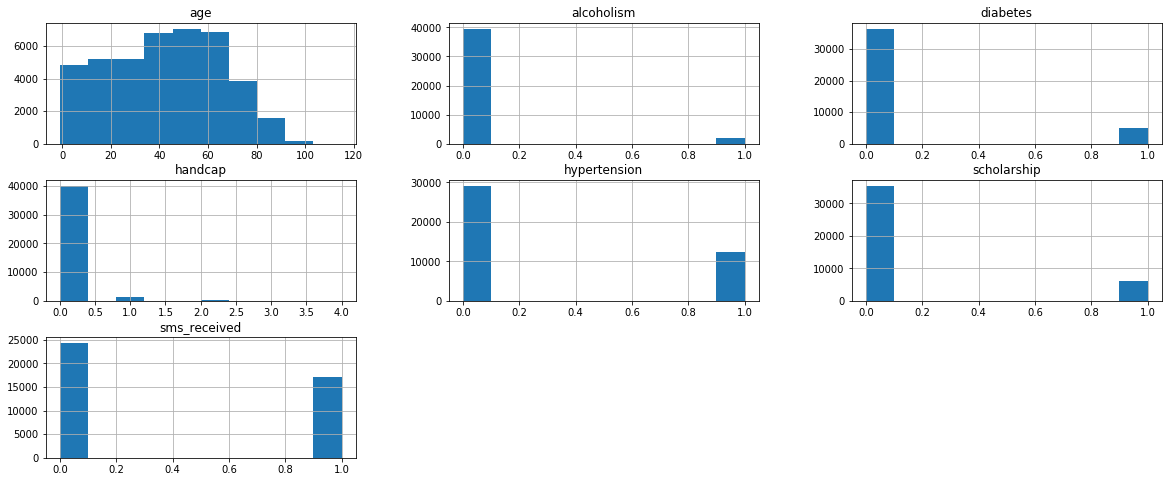

In [13]:
df.hist(figsize= (20,8));

I would create masks for my question here using my dependent variables: _'Age and Gender'_ to analyze my independent variable _'No-show'._

In [14]:
did_show = df.no_show == 'No'
did_not_show = df.no_show == 'Yes'

In [15]:
df[did_show].count()

gender           28680
age              28680
neighbourhood    28680
scholarship      28680
hypertension     28680
diabetes         28680
alcoholism       28680
handcap          28680
sms_received     28680
no_show          28680
dtype: int64

In [16]:
df[did_not_show].count()

gender           12873
age              12873
neighbourhood    12873
scholarship      12873
hypertension     12873
diabetes         12873
alcoholism       12873
handcap          12873
sms_received     12873
no_show          12873
dtype: int64

We can see that those who showed are higher than those that did not show by 65889. I would show these through proper visualization below.

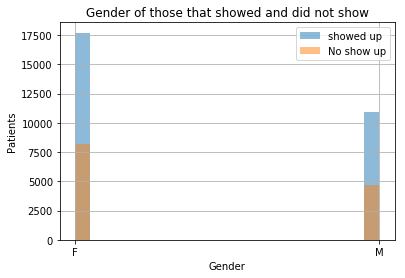

In [17]:
df.gender[did_show].hist(alpha=0.5,bins= 20, label='showed up')
df.gender[did_not_show].hist(alpha=0.5, bins=20, label= 'No show up')
plt.legend()
plt.title ('Gender of those that showed and did not show') 
plt.xlabel('Gender')
plt.ylabel('Patients');

In [18]:
df.groupby(['gender'])[['alcoholism']].count()

,alcoholism
gender,
F,25862
M,15691


We can see from this barplot that females showed up more than their male counterparts and as we can see below, females are also found more in this dataset.

In [24]:
def plot_bar (df, no_show):
    df.groupby([no_show]).count().plot(kind= 'bar').set_ylabel('count')
    df.groupby(['gender'])[['no_show']].count()

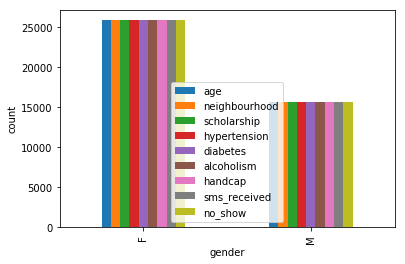

In [25]:
plot_bar(df, 'gender')

I used a function that would help to further understand the gap and differences between the genders male and female.

### Research Question 2  
 - Are people of a certain age likely to show up to their appointment because of the scholarship.

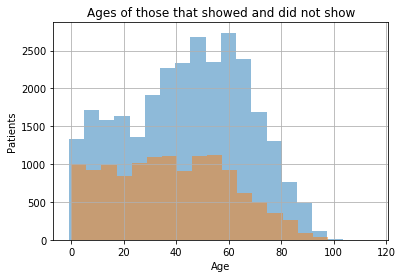

In [28]:
df.age[did_show].hist(alpha=0.5,bins= 20, label='showed up')
df.age[did_not_show].hist(alpha=0.5, bins=20, label= 'No show up')
plt.title ('Ages of those that showed and did not show') 
plt.xlabel('Age')
plt.ylabel('Patients');

In [ ]:
df.boxplot(column= ['age'], by= ['no_show'], rot=90)
plt.ylabel('Age');

We can see that patients within the age group of 0-10 showed up to their appointments more than any other age group followed by ages 35-70 and I also used a box plot for further explanation.

## Conclusions
- The number of those that did not show up to their was almost 4 times of the people that didn't show up to their appointments.
- Age plays a significant amount of role and it seems like the older you get, the lower the tendency to meet up with your appointment occurs.
- Females also showed up a lot more than the males to their appointments and females are larger in size also.
- 
```
Limitations
```
There are some columns that I believe to have little to no significance to the dataset, also I dont think the sample is a good representation because they seem to be a lot more females than men which makes the analysis biased in a way.

## Submitting your Project 

In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0